In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from pprint import pprint

In [3]:
import pyplotdesigner as ppd

# example using simple constraints

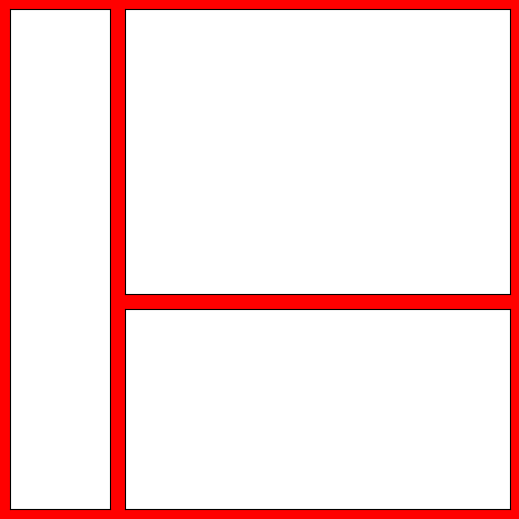

In [4]:
axis_spacing = 0.15
margin = 0.5

pd = ppd.PlotDescription(6, 6)

# add three axes
ax1 = pd.add_axis(0, 0, 1, 1)
ax2 = pd.add_axis(0, 0, 1, 1)
ax3 = pd.add_axis(0, 0, 1, 1)

# align left plot
pd.add_constraint(None, ax1, 'w', 'w', 'move separation', margin)

# align to north boundary
pd.add_constraint(None, [ax1, ax2], 'n', 'n', 'move separation', -margin)
# set margins
pd.add_constraint(ax1, [ax2, ax3], 'e', 'w', 'move separation', axis_spacing)

# resize remaining degrees of freedom to respect desired separations
pd.add_constraint(None, [ax1, ax3], 's', 's', 'resize separation', margin)
pd.add_constraint(None, [ax2, ax3], 'e', 'e', 'resize separation', -margin)

# force two right plots to obey given aspect ratio in heights
pd.add_constraint(ax2, ax3, 'w', 'w', 'resize duplicate', 2.0)

# notice that this call will *resize* ax2, which means ax3 loses its duplicate
# relationship with ax2!
pd.add_constraint(ax3, ax2, 'n', 's', 'resize separation', axis_spacing)

# apply constraints and make image of layout
pd.apply_constraints()

fig = pd.get_matplotlib_figure(facecolor='r')
fig.savefig('test.png')

In [5]:
print(pd)
print('\nAxes:')
pprint(pd.axes)
print('\nConstraints:')
pprint(pd.constraints)

PlotDescription<6x6, 3 axes, 0 text elements>

Axes:
[PlotAxis<axis_0, x0=0.5, y0=0.5, w=1, h=5.0>,
 PlotAxis<axis_1, x0=1.65, y0=2.65, w=3.85, h=2.85>,
 PlotAxis<axis_2, x0=1.65, y0=0.5, w=3.85, h=2.0>]

Constraints:
[PlotConstraint<None.w m s:0.5 axis_0.w>,
 PlotConstraint<None.n m s:-0.5 axis_0.n>,
 PlotConstraint<None.n m s:-0.5 axis_1.n>,
 PlotConstraint<axis_0.e m s:0.15 axis_1.w>,
 PlotConstraint<axis_0.e m s:0.15 axis_2.w>,
 PlotConstraint<None.s r s:0.5 axis_0.s>,
 PlotConstraint<None.s r s:0.5 axis_2.s>,
 PlotConstraint<None.e r s:-0.5 axis_1.e>,
 PlotConstraint<None.e r s:-0.5 axis_2.e>,
 PlotConstraint<axis_1.w r d:2.0 axis_2.w>,
 PlotConstraint<axis_2.n r s:0.15 axis_1.s>]
